In [205]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.datasets import load_iris



Data generation

In [206]:
data = load_iris()

In [207]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [208]:
data_x = data.data
print(f"Data shape {data.data.shape}")

Data shape (150, 4)


In [209]:
data_y = data.target
print(f"Data shape {data.target.shape}")

Data shape (150,)


Build LinearRegression Model

In [230]:
class LinearRegression(object):
    # constructor กำหนด Paramiter ต่าง ๆ
    def __init__(self, data_x, data_y,
                w_init = None, b_init = None, learning_rate = 0.1 ):
        
        scale = 4.0
        self.x = data_x
        self.y = data_y
        self.lr = learning_rate
        
        
        #เอาไว้เก็บการ updata หรือ history ต่างๆ
        self.loss_history = []
        self.epochs = []
        self.w_history = []
        self.b_history = []
        
        
        '''
        
        ตั้งเงื่อนไข ของการกำหนดค่า Innitizer ของ W, B
        ถ้ามีการรับค่า paramiter เข้ามาจะให้ w_init and b_init เป็น ค่าที่รับเข้ามาเลย
    
        '''
        if w_init is not None:
            #self.w = w_init 
            self.w = np.random.uniform(low = -w_init, high = w_init, size = (4, 1))
            #print(f"Weigth shape {self.shape}")
            
        else:
            #init w
            self.w = np.random.uniform(low = a - scale, high = a + scale)
        
        if b_init is not None:
            #self.b = b_init
            self.b = np.random.uniform(low = -b_init, high = b_init, size = (1, 1))
        else:
            #init b
            self.b = np.random.uniform(low = a - scale, high = a + scale)
        
        
    def sigmoid(self ,X):
        return 1/(1+np.exp(-X))
    
    def inference(self, x):
        '''
        Inference เป็น function ของ model 
        y_pred = W*X + B
        หรือ InearRegression 
        
        ให้ Return คำตอบ ที่ได้จากการคำนวน ออกจาก Method
        
        '''
        
        y_pred = np.dot(x, self.w) + self.b
        
        return y_pred
   

    def loss_function(self, labels, prediction):
        #MSE
        #Return mean ของ data shape : 0-rank Tensor (Vector) array
        
        loss = np.mean((prediction - labels)**2)
        
        return loss
    
        
    def loss_derivative(self):
        """
        การหาอนุพัน หรือกับ ดิป 
        
        Return :
            dw: dl /dw , ของค่า mean
            db: dl / db
        """
        
        dw = np.mean((self.y_pred - self.y) * self.x)
        db = np.mean(self.y_pred - self.y)
        return dw, db
    
    def updata_weights(self):
        """
        w = w - learning_rate * (dl/dw)
        
        """
        self.w = self.w - self.lr * self.dw
        self.b = self.b - self.lr * self.db
        
    def history(self, loss, w, b):
        
        self.loss_history.append(loss)
        self.w_history.append(w)
        self.b_history.append(b)
        
    def fit(self, max_epoch):
        
        pre_loss = 0.
        for epoch in range(max_epoch):
            
            print(epoch)
            self.y_pred = self.inference(self.x)
            self.sigmoid(self.y_pred)
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)

            self.dw, self.db = self.loss_derivative()
            self.updata_weights()
            #if np.abs(pre_loss - self.loss) <1e-6:
                
            self.loss = self.loss_function(self.y, self.y_pred)
            self.history(self.loss, self.w, self.b)
            print(f"Epoch {epoch+1} loss: {self.loss}")
            #Weights {self.w} Biases {self.b}")

                #break
            pre_loss = self.loss
            
        self.epochs.append(epoch)
        self.w_history = np.array(self.w_history)
        self.b_history = np.array(self.b_history)


In [231]:
data_x.shape

(150, 4)

In [232]:
data_y.resize(150, 1)
data_y.shape

(150, 1)

In [233]:
%time
epoch = 1000
model = LinearRegression(data_x, data_y, 2, 1, 0.001)
#print(f'Weigths shape {self.w}')

Wall time: 0 ns


In [234]:
model.fit(epoch)

0
Epoch 1 loss: 2.304821118257655
1
Epoch 2 loss: 2.093463722850821
2
Epoch 3 loss: 1.9032696758989731
3
Epoch 4 loss: 1.732119816152438
4
Epoch 5 loss: 1.5781071815102385
5
Epoch 6 loss: 1.4395157607650488
6
Epoch 7 loss: 1.3148013730114607
7
Epoch 8 loss: 1.202574461667064
8
Epoch 9 loss: 1.1015846113893581
9
Epoch 10 loss: 1.0107066153688087
10
Epoch 11 loss: 0.9289279377533728
11
Epoch 12 loss: 0.8553374315050284
12
Epoch 13 loss: 0.7891151859774271
13
Epoch 14 loss: 0.72952339109169
14
Epoch 15 loss: 0.6758981163147489
15
Epoch 16 loss: 0.6276419128378151
16
Epoch 17 loss: 0.5842171565250079
17
Epoch 18 loss: 0.5451400574562072
18
Epoch 19 loss: 0.5099752693156687
19
Epoch 20 loss: 0.4783310385617196
20
Epoch 21 loss: 0.4498548393273362
21
Epoch 22 loss: 0.4242294454136431
22
Epoch 23 loss: 0.40116939560866544
23
Epoch 24 loss: 0.38041781294627725
24
Epoch 25 loss: 0.3617435424640613
25
Epoch 26 loss: 0.34493857556764485
26
Epoch 27 loss: 0.3298157323025904
27
Epoch 28 loss: 0.316

516
Epoch 517 loss: 0.19101227791858383
517
Epoch 518 loss: 0.1910063858037222
518
Epoch 519 loss: 0.19100049424454443
519
Epoch 520 loss: 0.1909946032409981
520
Epoch 521 loss: 0.19098871279303084
521
Epoch 522 loss: 0.19098282290059018
522
Epoch 523 loss: 0.1909769335636237
523
Epoch 524 loss: 0.19097104478207913
524
Epoch 525 loss: 0.19096515655590415
525
Epoch 526 loss: 0.19095926888504627
526
Epoch 527 loss: 0.1909533817694531
527
Epoch 528 loss: 0.1909474952090722
528
Epoch 529 loss: 0.19094160920385134
529
Epoch 530 loss: 0.19093572375373818
530
Epoch 531 loss: 0.19092983885868028
531
Epoch 532 loss: 0.1909239545186254
532
Epoch 533 loss: 0.19091807073352102
533
Epoch 534 loss: 0.19091218750331498
534
Epoch 535 loss: 0.19090630482795493
535
Epoch 536 loss: 0.19090042270738838
536
Epoch 537 loss: 0.1908945411415632
537
Epoch 538 loss: 0.190888660130427
538
Epoch 539 loss: 0.19088277967392744
539
Epoch 540 loss: 0.19087689977201222
540
Epoch 541 loss: 0.19087102042462906
541
Epoch

Epoch 946 loss: 0.1885348977805026
946
Epoch 947 loss: 0.18852923930672996
947
Epoch 948 loss: 0.18852358136660657
948
Epoch 949 loss: 0.1885179239600821
949
Epoch 950 loss: 0.18851226708710608
950
Epoch 951 loss: 0.1885066107476283
951
Epoch 952 loss: 0.18850095494159855
952
Epoch 953 loss: 0.1884952996689664
953
Epoch 954 loss: 0.1884896449296815
954
Epoch 955 loss: 0.18848399072369368
955
Epoch 956 loss: 0.1884783370509526
956
Epoch 957 loss: 0.18847268391140795
957
Epoch 958 loss: 0.18846703130500947
958
Epoch 959 loss: 0.18846137923170678
959
Epoch 960 loss: 0.1884557276914498
960
Epoch 961 loss: 0.18845007668418806
961
Epoch 962 loss: 0.18844442620987145
962
Epoch 963 loss: 0.18843877626844951
963
Epoch 964 loss: 0.1884331268598721
964
Epoch 965 loss: 0.18842747798408907
965
Epoch 966 loss: 0.18842182964105006
966
Epoch 967 loss: 0.18841618183070474
967
Epoch 968 loss: 0.1884105345530031
968
Epoch 969 loss: 0.18840488780789477
969
Epoch 970 loss: 0.1883992415953295
970
Epoch 971 

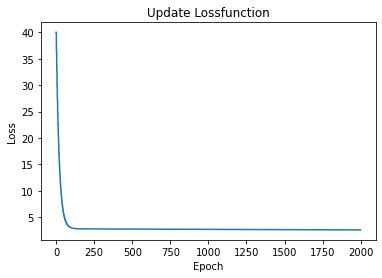

In [199]:
plt.plot(model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Update Lossfunction")
plt.show()